In [63]:
import mne
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
import matplotlib.pyplot as plt
import glob

Description of data:

In summary, the experimental runs were:

- Baseline, eyes open
- Baseline, eyes closed
- Task 1 (open and close left or right fist)
- Task 2 (imagine opening and closing left or right fist)
- Task 3 (open and close both fists or both feet)
- Task 4 (imagine opening and closing both fists or both feet)
- Task 1
- Task 2
- Task 3
- Task 4
- Task 1
- Task 2
- Task 3
- Task 4


Each annotation includes one of three codes (T0, T1, or T2):


- T0 corresponds to rest
- T1 corresponds to onset of motion (real or imagined) of
        the left fist (in runs 3, 4, 7, 8, 11, and 12)
        both fists (in runs 5, 6, 9, 10, 13, and 14)
- T2 corresponds to onset of motion (real or imagined) of
        the right fist (in runs 3, 4, 7, 8, 11, and 12)
        both feet (in runs 5, 6, 9, 10, 13, and 14)


The EEGs were recorded from 64 electrodes as per the international 10-10 system (excluding electrodes Nz, F9, F10, FT9, FT10, A1, A2, TP9, TP10, P9, and P10)

<img width="969" src="https://github.com/owalid/total-perspective-vortex/assets/28403617/3de37d6d-048e-4032-9c3c-eb070a8c184a">

Le choix du meilleur moyen de filtrer dépendra du type de bruit que vous souhaitez éliminer, de vos objectifs d'analyse et des caractéristiques spécifiques de vos données. Voici quelques techniques couramment utilisées pour filtrer les données EEG :

- **Filtre passe-bas :** Un filtre passe-bas permet de supprimer les fréquences supérieures à une certaine valeur. Cela peut être utile pour éliminer le bruit haute fréquence, mais il faut être prudent car cela peut également atténuer les signaux EEG de haute fréquence qui sont pertinents.
- **Filtre passe-haut :** Un filtre passe-haut élimine les fréquences basses. Cela peut être utilisé pour enlever les dérives lentes ou les interférences à basse fréquence. De même, il faut être prudent pour ne pas perdre les informations à basse fréquence contenues dans les signaux EEG.
- **Filtre bande-passante :** Un filtre bande-passante permet de conserver une plage spécifique de fréquences et d'éliminer les fréquences en dehors de cette plage. Cela peut être utile pour isoler des bandes de fréquences spécifiques, comme les ondes alpha (8-13 Hz) ou bêta (13-30 Hz).
- **Filtre réjecteur de bande (notch) :** Ce type de filtre élimine une fréquence spécifique et ses harmoniques. Il est utilisé pour supprimer les interférences provenant de sources extérieures, comme le bruit secteur (50 Hz ou 60 Hz).
- **Filtrage spatial :** L'analyse de composantes indépendantes (ICA) peut être utilisée pour extraire des sources indépendantes des signaux EEG, aidant à séparer les sources de bruit des sources cérébrales.

In [64]:
files = glob.glob('../files/S001/*.edf')

In [65]:
# files_0 = glob.glob('../files/S00*/*.edf')
# files_1 = glob.glob('../files/S01*/*.edf')

In [66]:
# merges
# files = files_0 + files_1

In [67]:
len(files)

14

In [68]:
raws = []

for i in range(3, len(files)):
    # print(i)
    current_file = files[i]
    r = read_raw_edf(current_file, preload=True, stim_channel='auto')
    events, _ = mne.events_from_annotations(r)
    # if i in []:
    #     # left hand for T1, right hand for T2
    #     if i % 3 == 0:
    #         new_labels_events = {1:'rest', 2:'action_l_hand', 3:'action_r_hand'} # action
    #     else:
    #         new_labels_events = {1:'rest', 2:'imagine_l_hand', 3:'imagine_r_hand'} # imagine
    # elif i in [5,6,9,10,13,14]:
        # both hands for T1, both feet for T2
    if i % 3 == 0:
        new_labels_events = {1:'rest', 2:'action_hand', 3:'action_feet'} # action
    else:
        new_labels_events = {1:'rest', 2:'imagine_hand', 3:'imagine_feet'} # imagine
    # else:
    #     continue
    # print(i)
    # update events in r
    # print(new_labels_events)
    # print(events)
    new_annot = mne.annotations_from_events(events=events, event_desc=new_labels_events, sfreq=r.info['sfreq'], orig_time=r.info['meas_date'])
    r.set_annotations(new_annot)
    raws.append(r)
    
raw_obj = concatenate_raws(raws)

Extracting EDF parameters from /Users/owalid/42/post_intership/total-perspective-vortex/files/S001/S001R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /Users/owalid/42/post_intership/total-perspective-vortex/files/S001/S001R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /Users/owalid/42/post_intership/total-perspective-vortex/files/S001/S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /Users/owalid/42/post_intership/total-perspective-vortex/fil

In [69]:
raw_obj.ch_names

['Fc5.',
 'Fc3.',
 'Fc1.',
 'Fcz.',
 'Fc2.',
 'Fc4.',
 'Fc6.',
 'C5..',
 'C3..',
 'C1..',
 'Cz..',
 'C2..',
 'C4..',
 'C6..',
 'Cp5.',
 'Cp3.',
 'Cp1.',
 'Cpz.',
 'Cp2.',
 'Cp4.',
 'Cp6.',
 'Fp1.',
 'Fpz.',
 'Fp2.',
 'Af7.',
 'Af3.',
 'Afz.',
 'Af4.',
 'Af8.',
 'F7..',
 'F5..',
 'F3..',
 'F1..',
 'Fz..',
 'F2..',
 'F4..',
 'F6..',
 'F8..',
 'Ft7.',
 'Ft8.',
 'T7..',
 'T8..',
 'T9..',
 'T10.',
 'Tp7.',
 'Tp8.',
 'P7..',
 'P5..',
 'P3..',
 'P1..',
 'Pz..',
 'P2..',
 'P4..',
 'P6..',
 'P8..',
 'Po7.',
 'Po3.',
 'Poz.',
 'Po4.',
 'Po8.',
 'O1..',
 'Oz..',
 'O2..',
 'Iz..']

In [70]:
original_raw = raw_obj.copy()

In [71]:
events, event_dict = mne.events_from_annotations(original_raw)
print(original_raw.info)
print(event_dict)

Used Annotations descriptions: ['action_feet', 'action_hand', 'imagine_feet', 'imagine_hand', 'rest']
<Info | 7 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
>
{'action_feet': 1, 'action_hand': 2, 'imagine_feet': 3, 'imagine_hand': 4, 'rest': 5}


In [72]:
picks = mne.pick_types(original_raw.info, meg=True, eeg=True, stim=False, eog=False, exclude='bads')

In [73]:
eegbci.standardize(original_raw)
montage = mne.channels.make_standard_montage('standard_1005')
original_raw.set_montage(montage)

<RawEDF | S001R10.edf, 64 x 209760 (1311.0 s), ~102.5 MB, data loaded>

Effective window size : 1.600 (s)


/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


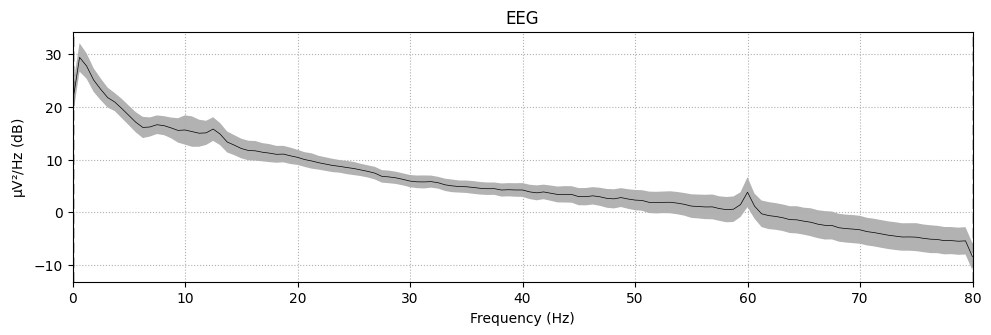

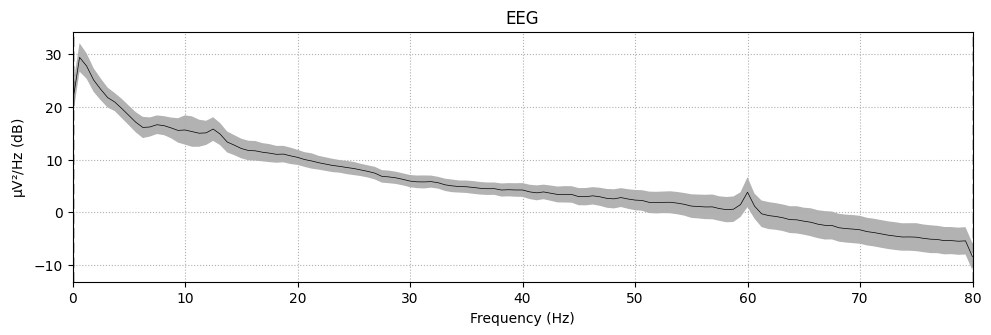

In [74]:
original_raw.compute_psd().plot(average=True)

Effective window size : 1.600 (s)


/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


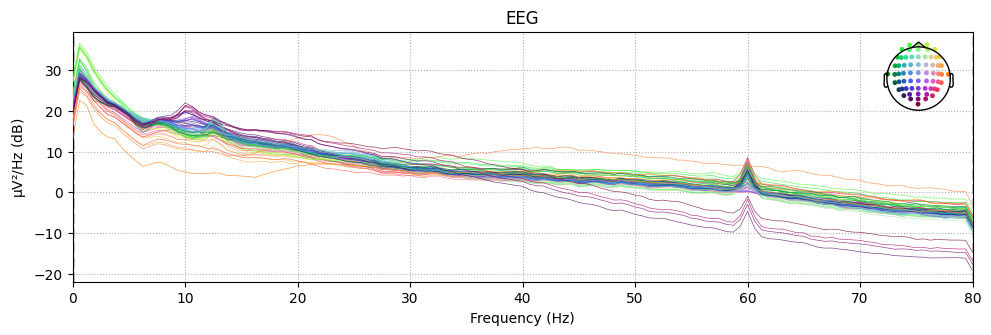

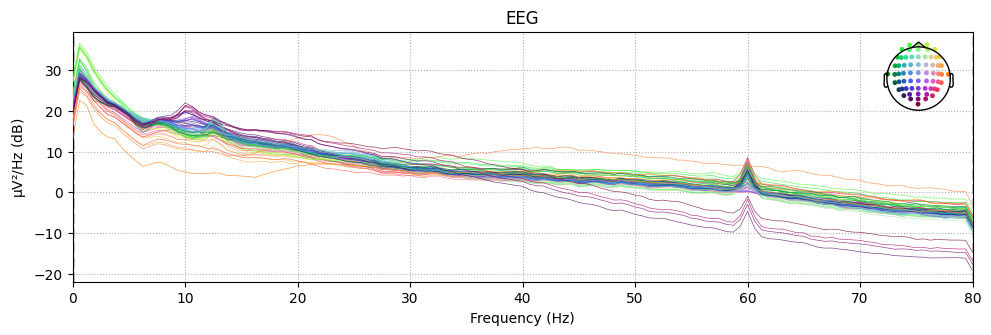

In [75]:
original_raw.compute_psd().plot()

## Notch filter

Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1057 samples (6.606 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Effective window size : 1.600 (s)


[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.5s finished
/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


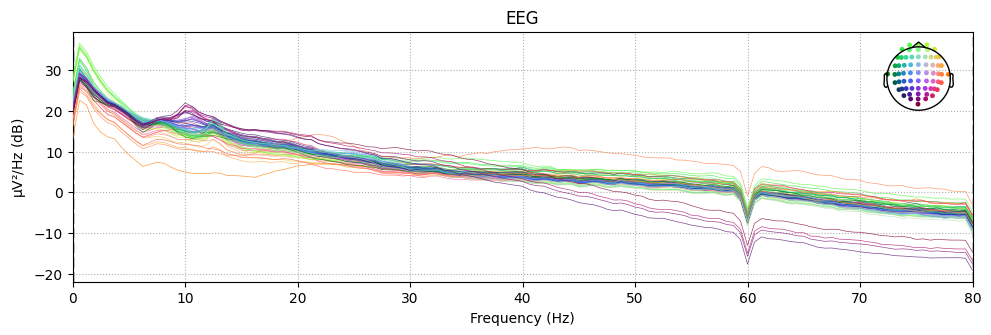

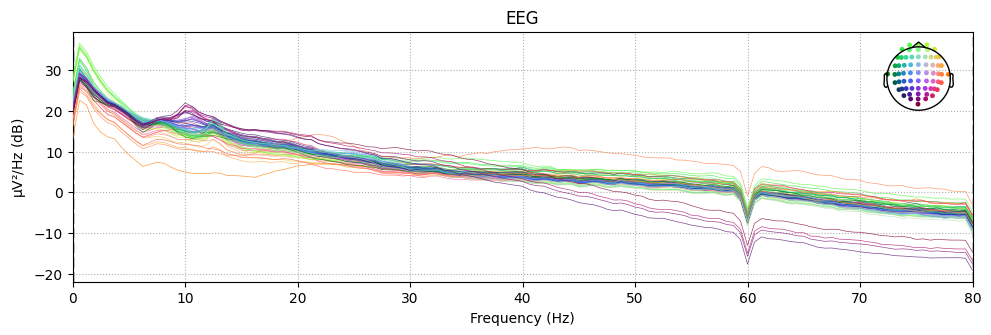

In [76]:
# Notch filter
notch_freq = 60
original_raw.notch_filter(notch_freq, fir_design='firwin')
original_raw.compute_psd().plot()

## Band-pass filter keep only alpha and beta waves

Filtering raw data in 11 contiguous segments
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 265 samples (1.656 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Effective window size : 1.600 (s)


/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


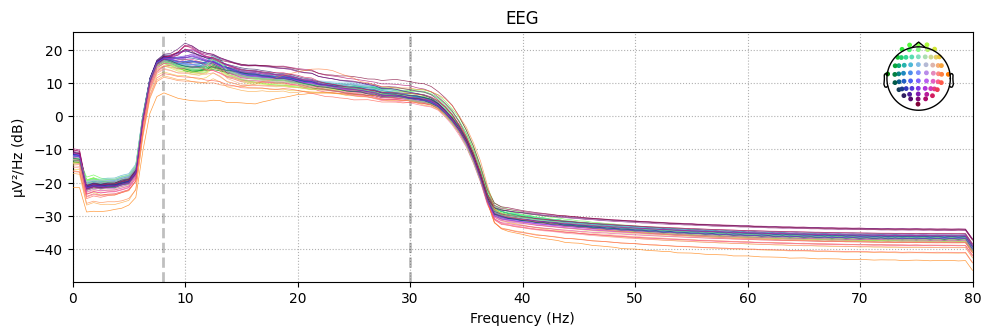

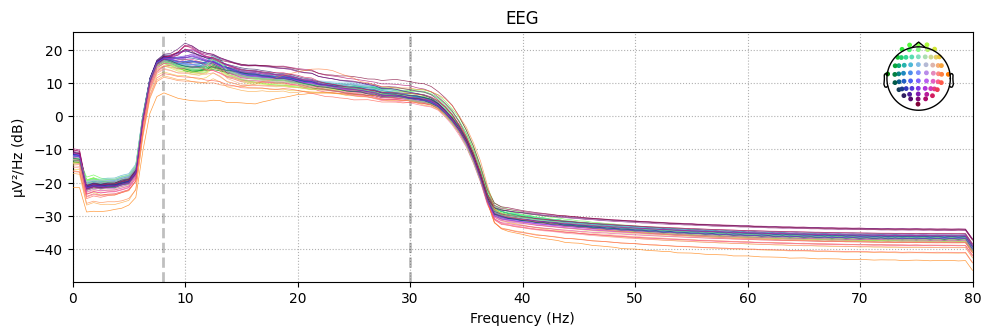

In [77]:
# Band-pass filter keep only alpha and beta waves
low_cutoff = 8
high_cutoff = 30
original_raw.filter(low_cutoff, high_cutoff, fir_design='firwin')
original_raw.compute_psd().plot()

## High-pass filter

Filtering raw data in 11 contiguous segments
Setting up low-pass filter at 2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 2.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 265 samples (1.656 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Effective window size : 1.600 (s)


/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


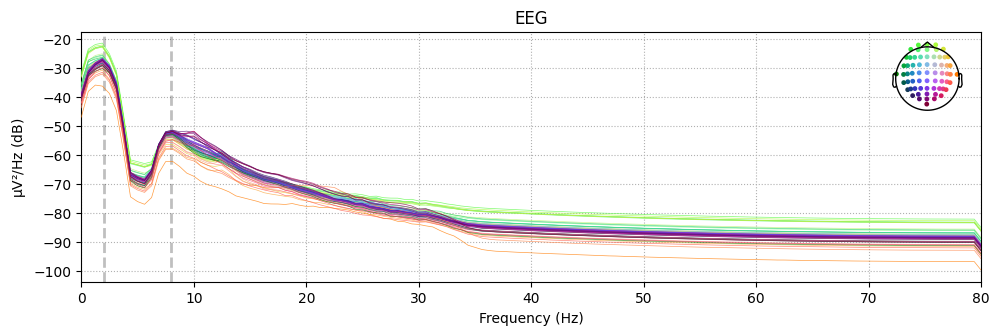

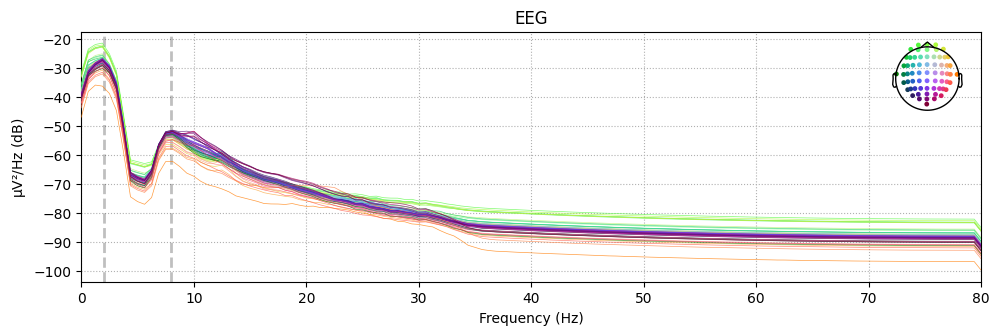

In [78]:
low_cutoff = 2
original_raw.filter(None, low_cutoff, fir_design='firwin')
original_raw.compute_psd().plot()

## Low-pass filter

Filtering raw data in 11 contiguous segments
Setting up low-pass filter at 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 61 samples (0.381 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.2s finished


Effective window size : 1.600 (s)


/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


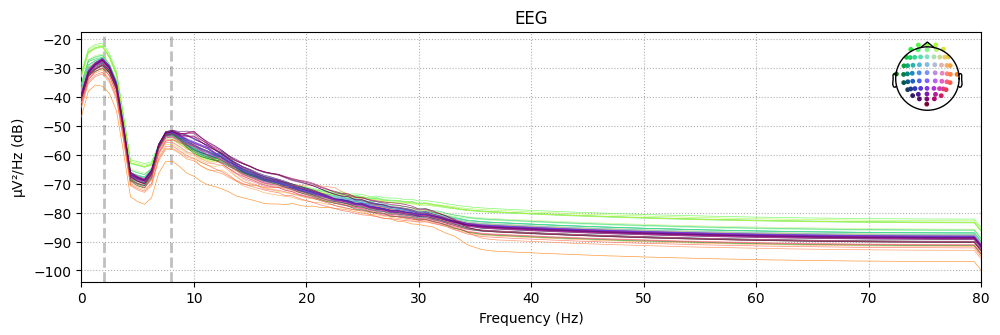

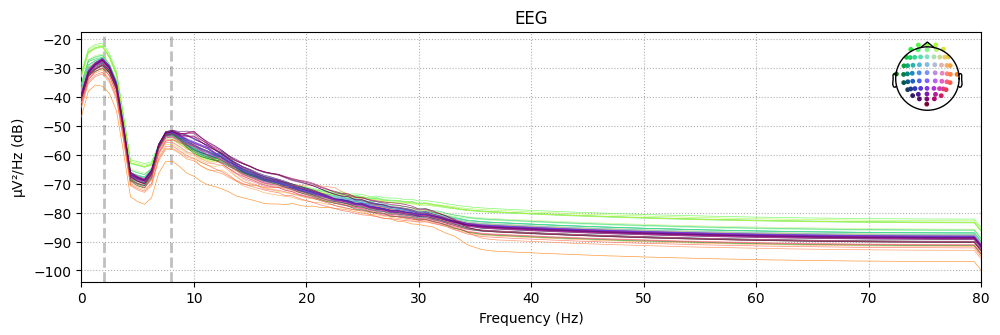

In [79]:
low_cutoff = 35
original_raw.filter(None, low_cutoff, fir_design='firwin')
original_raw.compute_psd().plot()

## Final result with basic filters

Effective window size : 1.600 (s)
Effective window size : 1.600 (s)


/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


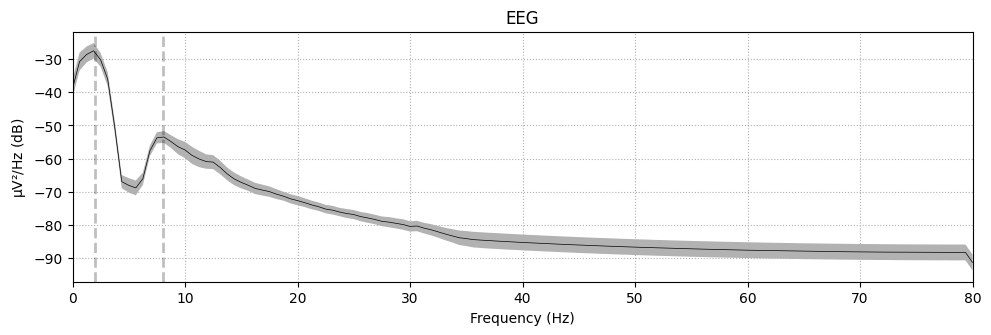

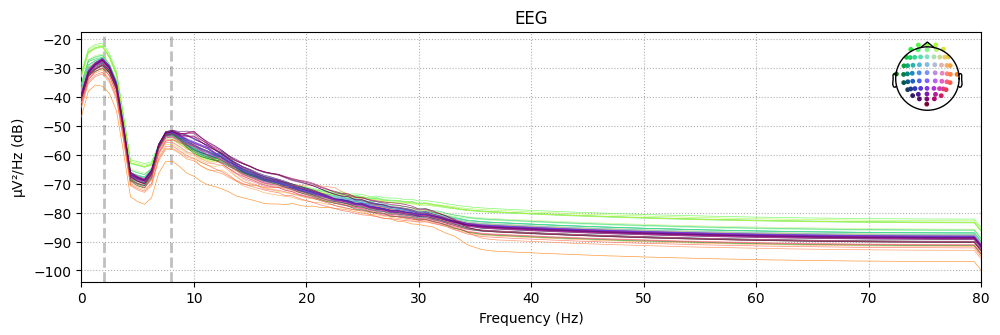

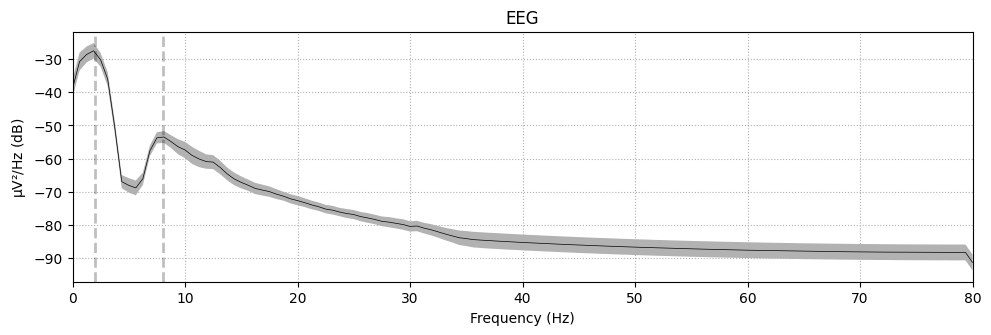

In [80]:
original_raw.compute_psd().plot()
original_raw.compute_psd().plot(average=True)

# ICA filtering

Spatial filtering: Independent component analysis (ICA) can be used to extract independent sources from EEG signals, helping to separate noise sources from brain sources.
ICA finds applications in various fields, including signal processing, pattern recognition, computer vision, and neuroscience. For example, in signal processing, ICA can be used to separate audio sources in a sound recording where multiple sound sources are mixed. In neuroscience, ICA can be used to separate brain activity into different sources that are associated with different brain processes.

The process of ICA can be summarized in a few key steps:

- **Problem formulation:** ICA assumes that the original source signals are statistically independent and attempts to recover them using this property. The goal is to find a transformation matrix that, when applied to the mixed signals, separates them into independent signals.
- **Estimation of independent components:** The objective is to find a demixing matrix that, when multiplied by the mixed signals, produces approximately independent demixed signals. This matrix can be obtained by maximizing a measure of non-gaussianity or independence, such as negentropy.
- **Optimization:** Optimization is used to adjust the parameters of the demixing matrix to maximize the independence property. Different optimization algorithms can be used, such as gradient descent or more sophisticated methods like FastICA.
- **Evaluation and interpretation:** Once the independent components are estimated, they can be evaluated and interpreted in the context of your problem. For example, in the field of computer vision, independent components can represent specific features or objects in images.

In [81]:
from mne.preprocessing import ICA

In [82]:
n_components = 20
ica = ICA(n_components=n_components, random_state=97, max_iter=800)

In [83]:
# tmp_raw = original_raw.copy()
ica.fit(original_raw)

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 5.9s.


<ICA | raw data decomposition, method: fastica (fit in 44 iterations on 209760 samples), 20 ICA components (64 PCA components available), channel types: eeg, no sources marked for exclusion>

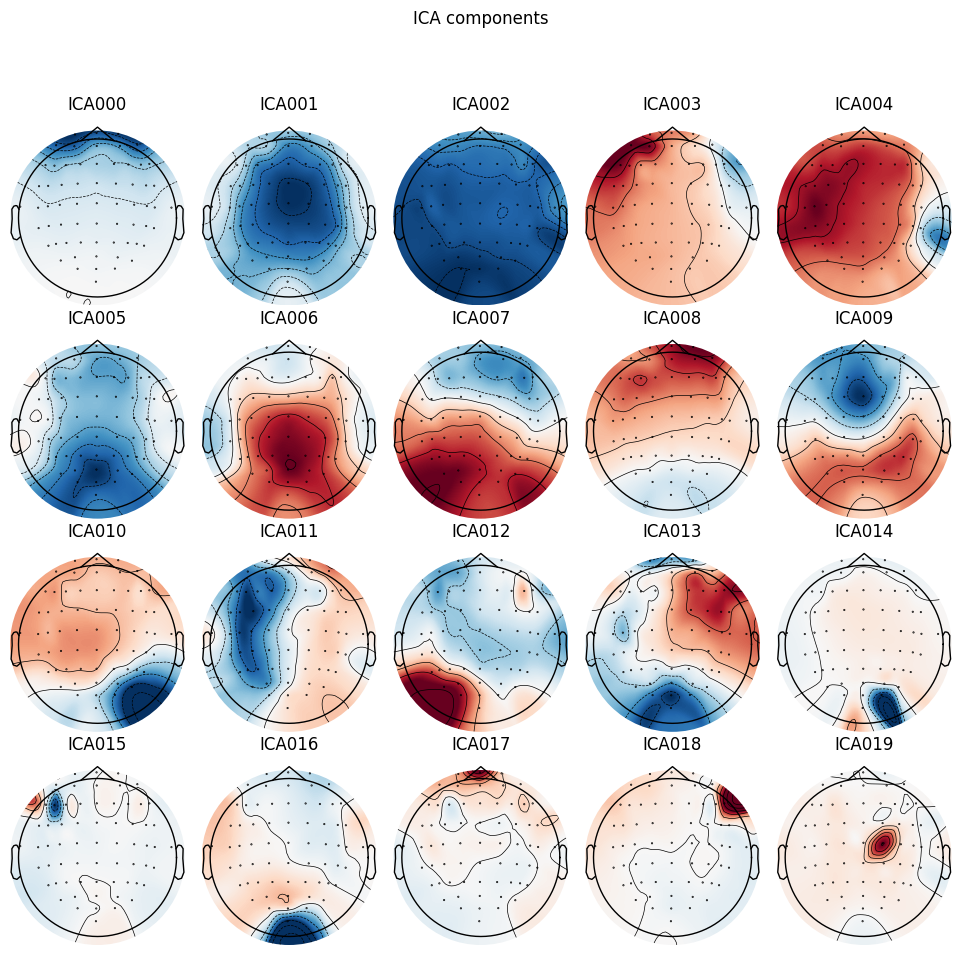

[<MNEFigure size 975x967 with 20 Axes>]

In [84]:
ica.plot_components()

In [85]:
components_to_excludes, scores = ica.find_bads_eog(original_raw, ch_name='Fpz')

Using EOG channel: Fpz
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1600 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished


- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1600 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


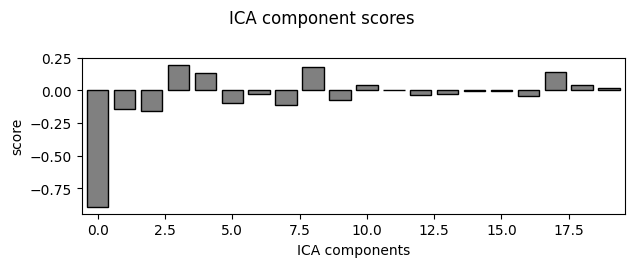

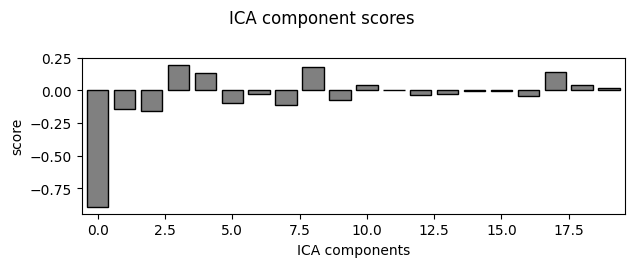

In [86]:
ica.plot_scores(scores)

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
62 matching events found
No baseline correction applied
0 projection items activated


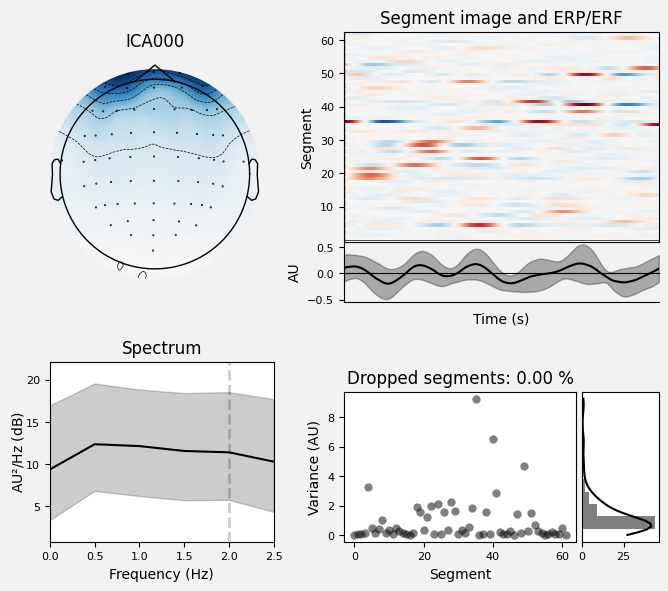

In [87]:
if components_to_excludes is not None and len(components_to_excludes) > 0:
    ica.plot_properties(original_raw, picks=components_to_excludes)
else:
    print("No components to exclude")

In [88]:
components_to_excludes

[0]

In [89]:
# apply ICA with components to exclude
ica.exclude = components_to_excludes
ica.apply(original_raw)

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 1 ICA component
    Projecting back using 64 PCA components


<RawEDF | S001R10.edf, 64 x 209760 (1311.0 s), ~102.5 MB, data loaded>

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
62 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
62 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
62 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
62 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
62 matching events found
No baseline correction applied
0 projection items activated


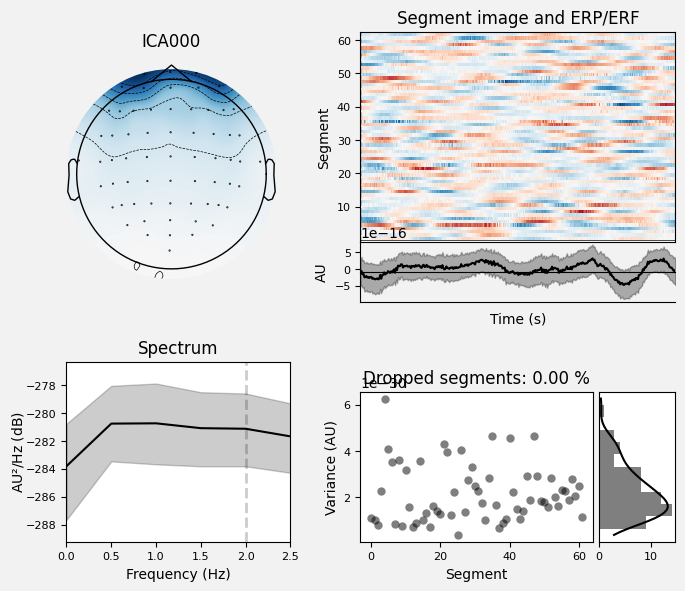

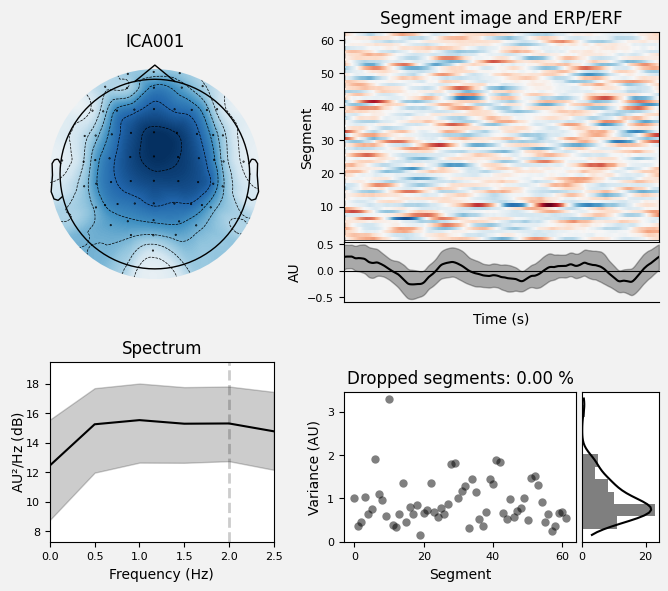

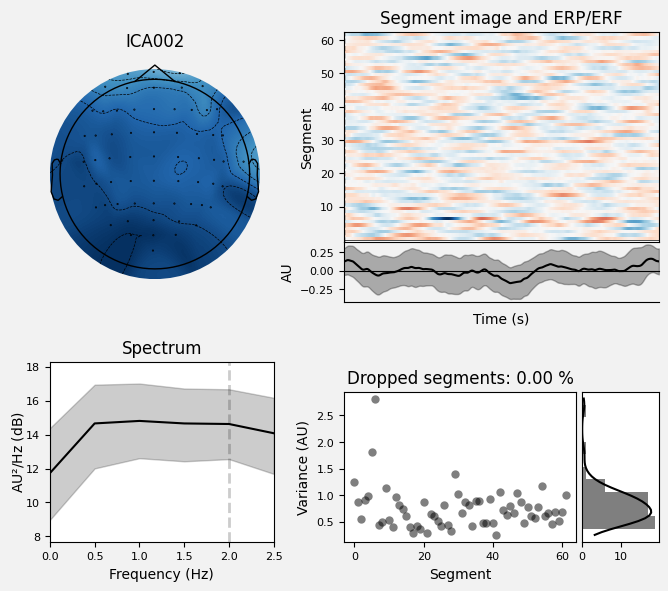

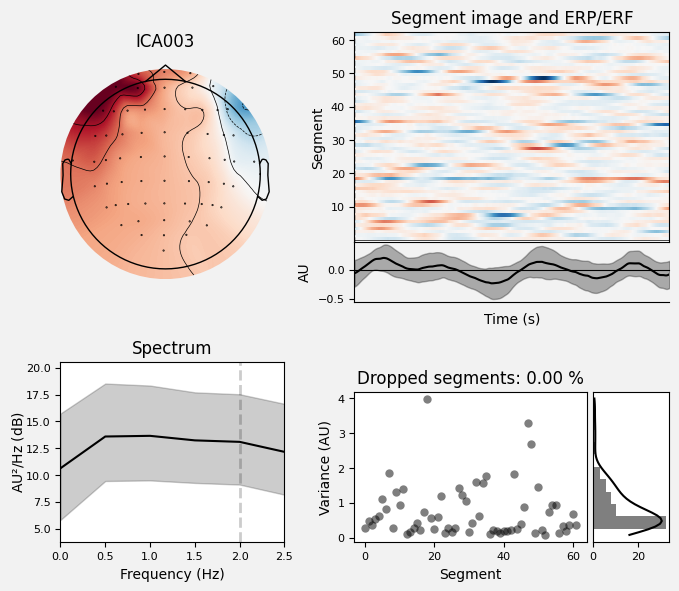

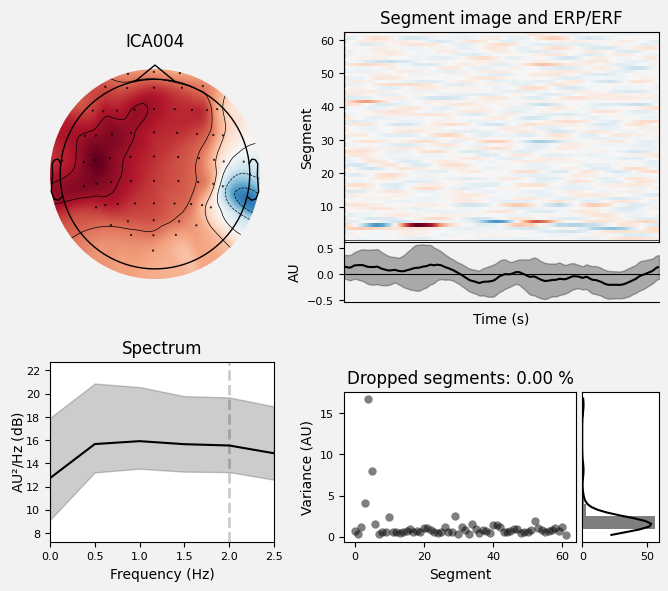

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [90]:
ica.plot_properties(original_raw)

Creating RawArray with float64 data, n_channels=20, n_times=209760
    Range : 0 ... 209759 =      0.000 ...  1310.994 secs
Ready.


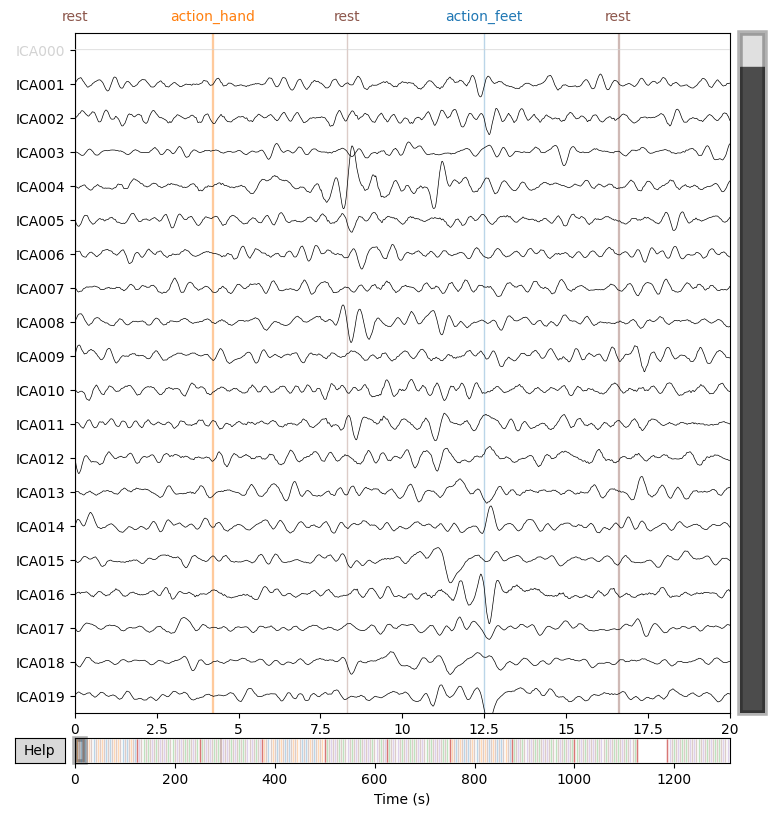

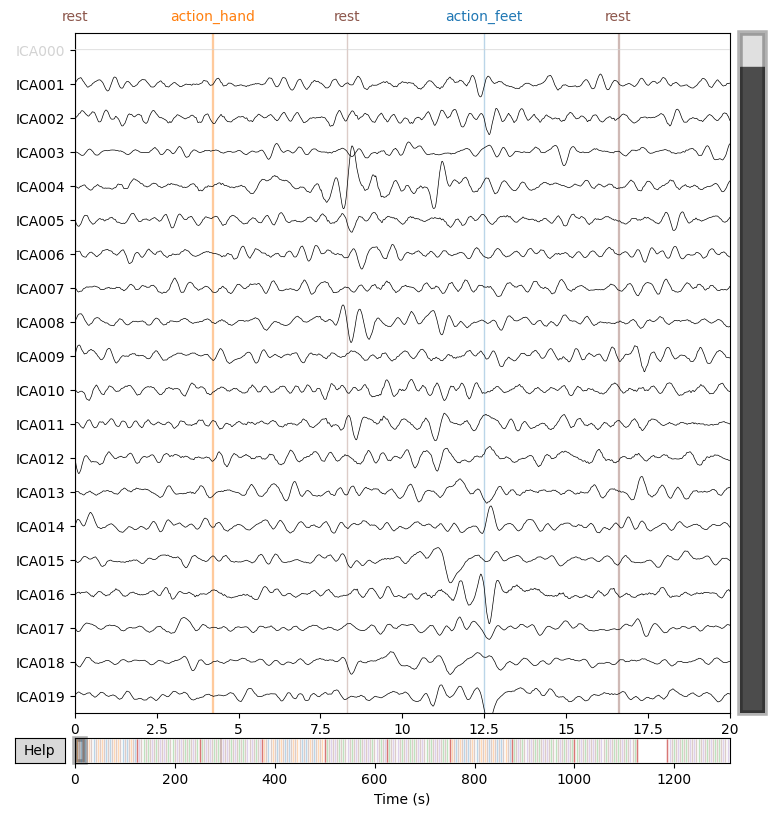

In [91]:
ica.plot_sources(original_raw)

Effective window size : 1.600 (s)


/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


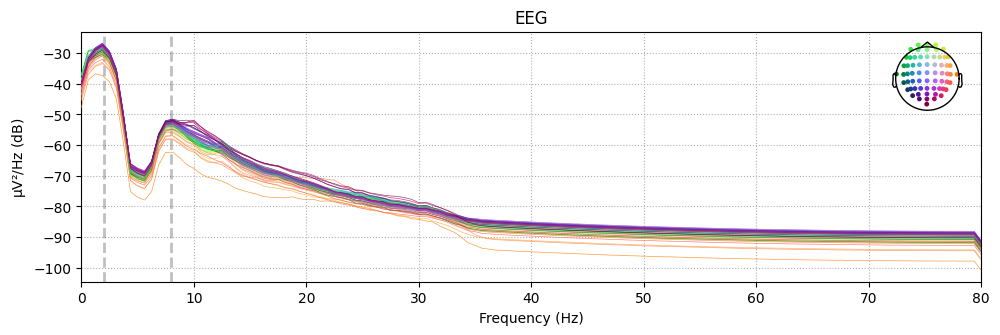

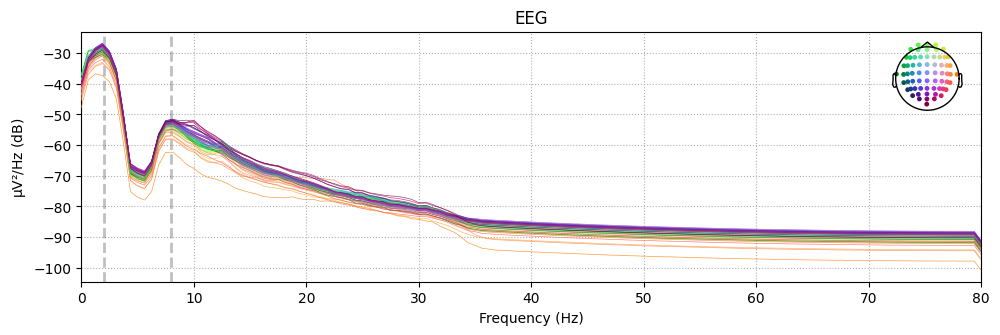

In [92]:
original_raw.compute_psd().plot()

## Epochs

In the MNE-Python library, an "epoch" refers to a specific time interval of continuous EEG or MEG data that is extracted for further analysis. The concept of epochs is particularly relevant when dealing with event-related potentials (ERPs) or event-related fields (ERFs) in EEG or MEG data analysis. Epochs allow you to focus on specific segments of data around events of interest.

- Get Events: Before creating epochs, you typically need to define events in your data. Events are time points that mark specific occurrences, such as the onset of a stimulus or the occurrence of a response.

- Creating Epochs: Once events are defined, you can create epochs by extracting data around each event. An epoch is a time window that includes a certain duration of data before and after the event. This time window is defined using parameters such as the baseline period, the time before the event, and the time after the event.

-  Storing Data: Epochs are stored as multi-dimensional arrays with dimensions for channels, time points, and epochs. This format allows for efficient storage and analysis of the segmented data.

- Applying Analysis: You can apply various analyses to the epochs, such as computing the average ERP, comparing conditions, and conducting statistical analyses.

In [93]:
# get events
events, event_dict = mne.events_from_annotations(original_raw)

Used Annotations descriptions: ['action_feet', 'action_hand', 'imagine_feet', 'imagine_hand', 'rest']


In [94]:
event_dict

{'action_feet': 1,
 'action_hand': 2,
 'imagine_feet': 3,
 'imagine_hand': 4,
 'rest': 5}

In [95]:
# replace event name with event id
# event_dict = {
#     'action_fist': 1,
#     'image_fist': 2,
#     'action_feet': 3,
#     'image_feet': 4,
# }

In [96]:
# create epochs from events
tmin = -1  # Time before event in seconds
tmax = 1   # Time after event in seconds
epochs = mne.Epochs(original_raw, events, event_dict, tmin, tmax, baseline=None, preload=True)
epochs

Not setting metadata
301 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 301 events and 321 original time points ...
11 bad epochs dropped


<Epochs |  290 events (all good), -1 - 1 sec, baseline off, ~45.5 MB, data loaded,
 'action_feet': 23
 'action_hand': 22
 'imagine_feet': 53
 'imagine_hand': 52
 'rest': 140>

rest
No projector specified for this dataset. Please consider the method self.add_proj.


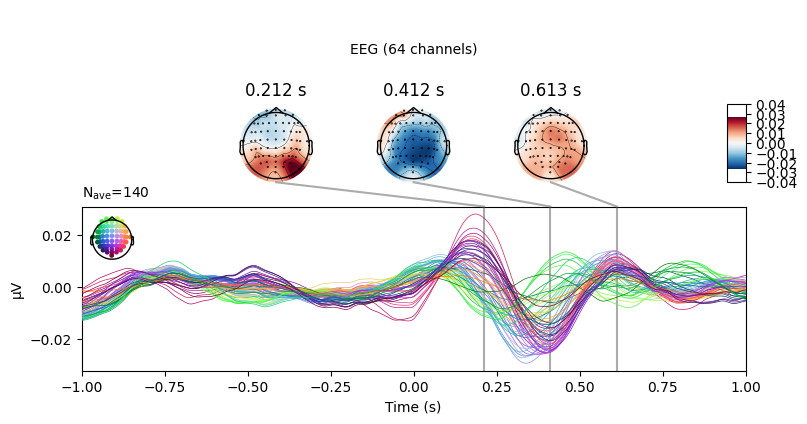

imagine_feet
No projector specified for this dataset. Please consider the method self.add_proj.


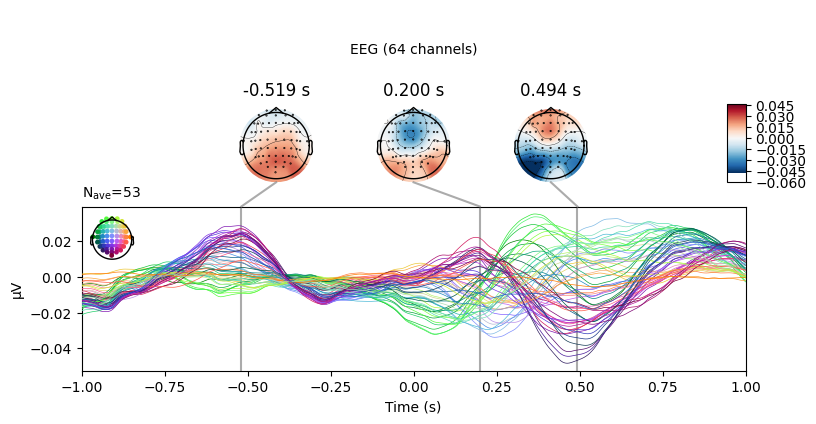

action_feet
No projector specified for this dataset. Please consider the method self.add_proj.


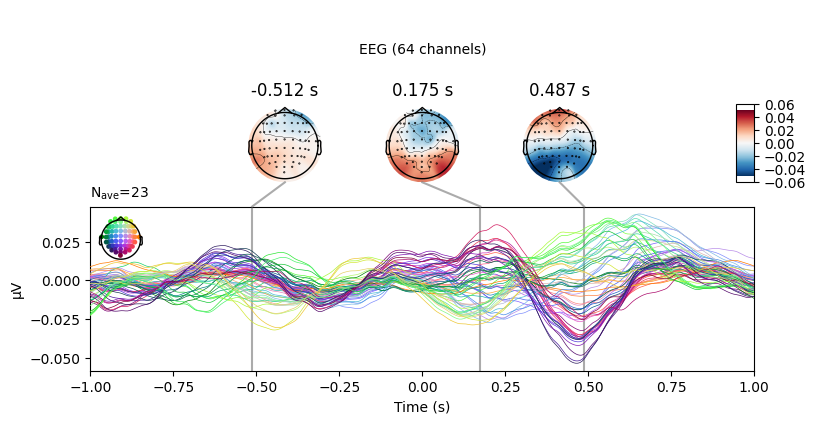

imagine_hand
No projector specified for this dataset. Please consider the method self.add_proj.


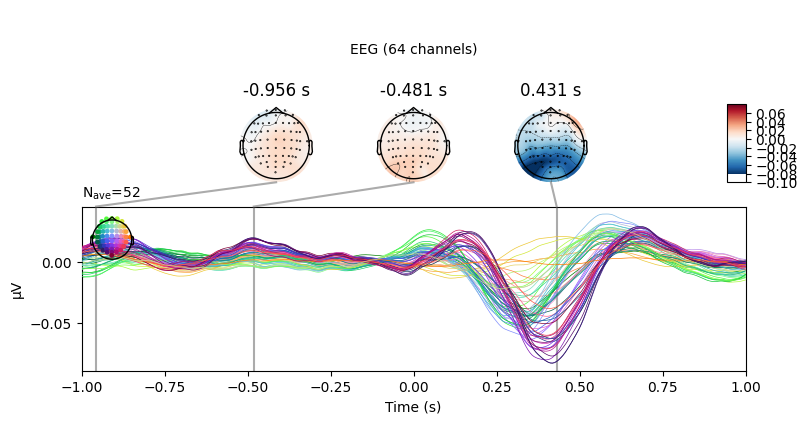

action_hand
No projector specified for this dataset. Please consider the method self.add_proj.


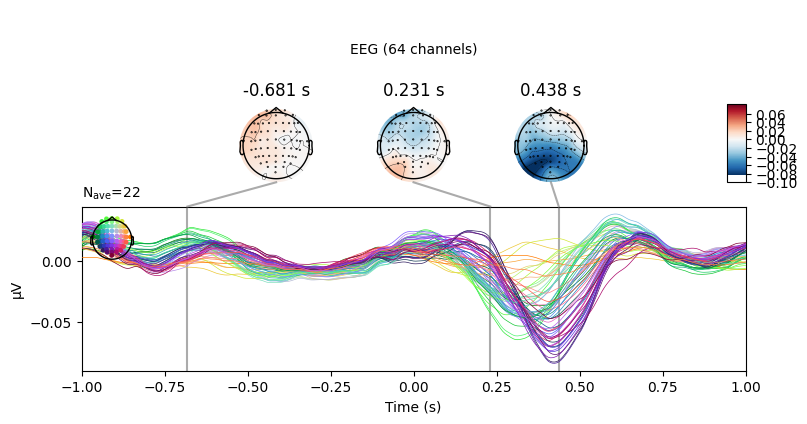

In [100]:
evoked = {
    'rest': epochs['rest'].average(),
    'imagine_feet': epochs['imagine_feet'].average(),  
    'action_feet': epochs['action_feet'].average(),
    'imagine_hand': epochs['imagine_hand'].average(),
    'action_hand': epochs['action_hand'].average(),
    # 'action_b_feet': epochs['action_b_feet'].average(),
    # 'action_b_hand': epochs['action_b_hand'].average(),
    # 'action_l_hand': epochs['action_l_hand'].average(),
    # 'action_r_hand': epochs['action_r_hand'].average(),
    # 'imagine_b_feet': epochs['imagine_b_feet'].average(),  
    # 'imagine_b_hand': epochs['imagine_b_hand'].average(),
    # 'imagine_l_hand': epochs['imagine_l_hand'].average(),
    # 'imagine_r_hand': epochs['imagine_r_hand'].average(),
}

for key in evoked.keys():
    print(key)
    evoked[key].plot_joint()    

## Training

### Covariance

La covariance est la moyenne des produits moins le produit des moyennes. La covariance se compare au produit des écarts-types par l'inégalité de Cauchy-Schwarz.
Autrement dit, la covariance entre deux variables aléatoires est un nombre permettant de quantifier leurs écarts conjoints par rapport à leurs espérances respectives. Elle s’utilise également pour deux séries de données numériques (écarts par rapport aux moyennes). La covariance de deux variables aléatoires indépendantes est nulle, bien que la réciproque ne soit pas toujours vraie.


<img src="https://upload.wikimedia.org/wikipedia/commons/1/15/GaussianScatterPCA.png" width="500px">

### CSP

Le CSP, ou "Common Spatial Patterns" (Modèles spatiaux communs), est une technique d'extraction de caractéristiques largement utilisée dans le domaine de l'analyse des signaux EEG (électroencéphalographiques) et MEG (magnétoencéphalographiques). Son objectif principal est de transformer les signaux EEG en nouvelles représentations dans lesquelles les caractéristiques discriminantes liées à des classes spécifiques sont mises en évidence et amplifiées, tandis que les caractéristiques non discriminantes sont réduites.

- L'objectif du CSP est de trouver une transformation linéaire qui projette les données EEG dans un nouvel espace où les signaux sont maximalemement séparés selon les classes d'intérêt. En d'autres termes, le CSP cherche les combinaisons linéaires de canaux qui maximisent la variance entre deux classes tout en minimisant la variance au sein de chaque classe.

- Le processus de CSP consiste à calculer les matrices de covariance pour chaque classe et à les combiner pour obtenir une matrice de covariance globale. Ensuite, il utilise une décomposition en valeurs propres pour trouver les vecteurs propres correspondant aux valeurs propres les plus élevées de cette matrice de covariance globale. Ces vecteurs propres (appelés "filtres CSP") sont utilisés pour projeter les signaux EEG d'origine dans un nouvel espace.

- Les filtres CSP trouvés sont appliqués aux données EEG pour créer de nouvelles séries temporelles appelées "composantes CSP". Ces composantes sont ordonnées par ordre décroissant de variance entre les classes. Les premières composantes sont censées contenir les informations les plus discriminantes entre les classes, tandis que les dernières contiennent des informations moins discriminantes.

- Les composantes CSP peuvent être utilisées comme caractéristiques pour des tâches de classification. En sélectionnant les composantes les plus discriminantes, on peut améliorer la séparation entre les classes et augmenter les performances de la classification.

- Supposons que vous analysiez des signaux EEG pour distinguer entre des états de repos et des états de mouvement. Le CSP cherchera à identifier les combinaisons de canaux EEG qui sont les plus informatives pour différencier ces deux états.

En résumé, le CSP est une technique puissante pour extraire des caractéristiques EEG discriminantes en se concentrant sur les différences inter-classes tout en atténuant les différences intra-classes. Cela permet d'améliorer la capacité des modèles de machine learning à discerner les motifs d'intérêt dans les signaux EEG.




### Pipeline avec CSP

Lorsque vous placez la CSP (Common Spatial Patterns) et le modèle de machine learning dans une pipeline, vous créez un flux de traitement automatique qui combine ces étapes de manière séquentielle. Cela permet d'automatiser le processus d'extraction de caractéristiques avec CSP et l'entraînement du modèle de machine learning.

Les étapes de la pipeline sont exécutées dans l'ordre où elles sont spécifiées. Cela signifie que d'abord, les données sont prétraitées avec le CSP, puis les données transformées par le CSP sont fournies en entrée au modèle de machine learning pour l'entraînement et les prédictions. Lors de l'entraînement, les données d'entraînement sont d'abord transformées par le CSP pour extraire les caractéristiques CSP. Ensuite, le modèle de machine learning est ajusté (entraîné) sur ces caractéristiques CSP. Lors des prédictions, les nouvelles données sont également transformées par le CSP avant d'être fournies au modèle pour obtenir les prédictions.


https://mne.tools/stable/auto_tutorials/machine-learning/50_decoding.html

In [221]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mne.decoding import CSP

from mne.decoding import (
    SlidingEstimator,
    GeneralizingEstimator,
    Scaler,
    cross_val_multiscore,
    LinearModel,
    get_coef,
    Vectorizer,
    CSP,
)
import numpy as np

In [107]:
_, event_dict = mne.events_from_annotations(original_raw)
event_dict

Used Annotations descriptions: ['action_feet', 'action_hand', 'imagine_feet', 'imagine_hand', 'rest']


{'action_feet': 1,
 'action_hand': 2,
 'imagine_feet': 3,
 'imagine_hand': 4,
 'rest': 5}

In [197]:
# data = epochs.get_data()

X = []  # Feature matrix
y = []  # Label vector
for event_type in event_dict.keys():
    event_epochs = epochs[event_type]
    for epoch in event_epochs:
        # # Extract features from each epoch and append to X
        # features = np.array([np.mean(epoch), np.max(epoch)])
        # X.append(epochs.get_data())
        
        # Append label to y
        y.append(event_dict[event_type])
y = np.array(y)
X = np.array(epochs.get_data())

In [214]:
X = epochs.get_data()  # MEG signals: n_epochs, n_meg_channels, n_times
y = epochs.events[:, 2]  # target: auditory left vs visual left

In [215]:
print(X.shape)
print(y.shape)

(290, 64, 321)
(290,)


In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [201]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
csp = CSP(n_components=14)
pipeline = Pipeline([
        ('csp', csp),
        ('model', model)
])

pipeline.fit(X_train, y_train)

# Predict labels on test data
y_pred = pipeline.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Computing rank from data with rank=None
    Using tolerance 3.3e-07 (2.2e-16 eps * 64 dim * 2.3e+07  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.6e-07 (2.2e-16 eps * 64 dim * 2.5e+07  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.4e-07 (2.2e-16 eps * 64 dim * 3.8e+07  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.1e-07 (2.2e-16 eps * 64 dim * 3.6e+07  max singular value)


In [259]:
models = [
    ('Gradient Boosting', GradientBoostingClassifier(), {'model__n_estimators': [50, 100, 200]}),
    ('SVM', SVC(), {'model__C': [0.1, 1, 10]}),
    ('KNN', KNeighborsClassifier(), {'model__n_neighbors': [3, 5, 7]}),
    ('Random Forest', RandomForestClassifier(), {'model__n_estimators': [50, 100, 200]}),
    ('MLP', MLPClassifier(), {'model__hidden_layer_sizes': [(50,), (100,), (50, 50)]})
]

In [260]:
pipelines = []
csp = CSP(n_components=14)  # You can adjust the number of CSP components
for name, model, param_grid in models:
    pipeline = Pipeline([
        ('csp', csp),
        ('model', model)
    ])
    pipelines.append((name, pipeline, param_grid))

In [261]:
results = []
for name, pipeline, param_grid in pipelines:
    grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    results.append((name, grid_search))

Computing rank from data with rank=None
Computing rank from data with rank=None
Computing rank from data with rank=None
Computing rank from data with rank=None
Computing rank from data with rank=None
Computing rank from data with rank=None
Computing rank from data with rank=None
Computing rank from data with rank=None
Computing rank from data with rank=None
Computing rank from data with rank=None
Computing rank from data with rank=None
Computing rank from data with rank=None
    Using tolerance 3.2e-07 (2.2e-16 eps * 64 dim * 2.2e+07  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
    Using tolerance 3.3e-07 (2.2e-16 eps * 64 dim * 2.3e+07  max singular value)
    Using tolerance 3.2e-07 (2.2e-16 eps * 64 dim * 2.2e+07  max singular value)
    Using tolerance 3.5e-07 (2.2e-16 eps * 64 dim * 2.4e+07  max singular value)
    Estimated rank (mag)

/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value N

Computing rank from data with rank=None
Computing rank from data with rank=None
    Using tolerance 3.2e-07 (2.2e-16 eps * 64 dim * 2.2e+07  max singular value)
    Estimated rank (mag): 64
    Using tolerance 3.5e-07 (2.2e-16 eps * 64 dim * 2.4e+07  max singular value)
    MAG: rank 64 computed from 64 data channels with 0 projectors
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Done.
Computing rank from data with rank=None
Computing rank from data with rank=None
Computing rank from data with rank=None
    Using tolerance 2.9e-07 (2.2e-16 eps * 64 dim * 2e+07  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
    Using tolerance 2.7e-07 (2.2e-16 eps * 64 dim * 1.9e+07  max singular value)
    Estimated rank (mag): 64
    MAG: r

/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value N

    Using tolerance 4.1e-07 (2.2e-16 eps * 64 dim * 2.9e+07  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
    Using tolerance 4.9e-07 (2.2e-16 eps * 64 dim * 3.4e+07  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Done.
Computing rank from data with rank=None
Computing rank from data with rank=None
    Using tolerance 4.9e-07 (2.2e-16 eps * 64 dim * 3.4e+07  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5e-07 (2.2e-16 eps * 64 dim * 3.5e+07  max singular value)
    Using tolerance 5.4e-07 (2.2e-16 eps *

/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Computing rank from data with rank=None
    Using tolerance 3.7e-07 (2.2e-16 eps * 64 dim * 2.6e+07  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None


/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value N

    Using tolerance 3.3e-07 (2.2e-16 eps * 64 dim * 2.3e+07  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.2e-07 (2.2e-16 eps * 64 dim * 3.7e+07  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.8e-07 (2.2e-16 eps * 64 dim * 4.1e+07  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8e-07 (2.2e-16 eps * 64 dim * 5.7e+07  max singular value)
    Estimated rank (mag): 64
    MAG: rank

/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

Computing rank from data with rank=None
    Using tolerance 3.2e-07 (2.2e-16 eps * 64 dim * 2.2e+07  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
Computing rank from data with rank=None
    Using tolerance 2.9e-07 (2.2e-16 eps * 64 dim * 2e+07  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.5e-07 (2.2e-16 eps * 64 dim * 2.4e+07  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
Computing rank from data with rank=None
   

/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

    Using tolerance 2.7e-07 (2.2e-16 eps * 64 dim * 1.9e+07  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
Computing rank from data with rank=None
    Using tolerance 3.1e-07 (2.2e-16 eps * 64 dim * 2.2e+07  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
    Using tolerance 4.1e-07 (2.2e-16 eps * 64 dim * 2.9e+07  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Computing rank from data with rank=None
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.9e-07 (2.2e-16 eps * 64 dim * 3.4e+07  max singular value)


/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.4e-07 (2.2e-16 eps * 64 dim * 3.8e+07  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
    Using tolerance 5e-07 (2.2e-16 eps * 64 dim * 3.5e+07  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Computing rank from data with rank=None
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
    Using tolerance 5e-07 (2.2e-16 eps * 64 dim * 3.5e+07  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
Computing rank from data with rank=None
    Usin

/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Computing rank from data with rank=None
    Using tolerance 3.7e-07 (2.2e-16 eps * 64 dim * 2.6e+07  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.3e-07 (2.2e-16 eps * 64 dim * 2.3e+07  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.2e-07 (2.2e-16 eps * 64 dim * 3.7e+07  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.8e-07 (2.2e-16 eps * 64 dim * 4.1e+07  max singular value)


/Users/owalid/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [264]:
for name, grid_search in results:
    print(f"Model: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best Cross-Validated Accuracy: {grid_search.best_score_:.2f}")
    print("\n")

Model: Gradient Boosting
Best Parameters: {'model__n_estimators': 100}
Best Cross-Validated Accuracy: 0.41


Model: SVM
Best Parameters: {'model__C': 1}
Best Cross-Validated Accuracy: 0.49


Model: KNN
Best Parameters: {'model__n_neighbors': 3}
Best Cross-Validated Accuracy: 0.44


Model: Random Forest
Best Parameters: {'model__n_estimators': 100}
Best Cross-Validated Accuracy: 0.46


Model: MLP
Best Parameters: {'model__hidden_layer_sizes': (50,)}
Best Cross-Validated Accuracy: 0.42


